In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

#comment below if not using ipython notebook
%matplotlib inline

In [29]:
N_SAMPLES = 100

### generate a sinusoidal dataset with a little of Gaussian noise

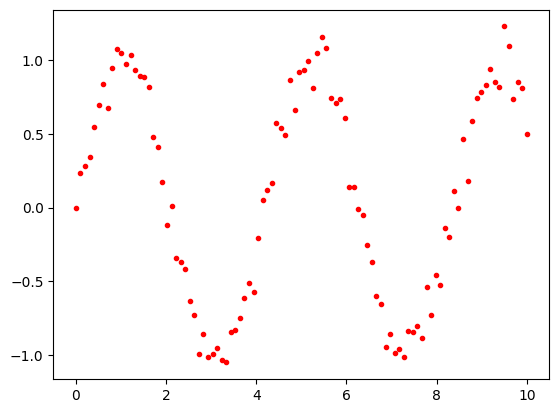

In [30]:
x = np.linspace(0, 10, N_SAMPLES)
y = np.sin(1.5*x) + 0.1*np.random.randn(N_SAMPLES)
plt.plot(x,y,'r.')

### let's estimate a parameter of the mathematical model, $\hat{y} = \sin(m x)$

Although we may model this as a linear model with a Sum of squared error as the loss function, the convexity of the loss function is not guaranteed anymore due to the non-linear property of the sinusoid. Convexity property is applicable when the correlation between all the predictor variables to the output are linear.

#### we will setup a line search for the parameter $m$ to based on loss minimization

In [45]:
# setup linear search for m.
m = np.linspace(-2, 2, 100)

#### compute the loss at different choice of 'm' value.

In [46]:
# compute and collect the loss at different m values.
loss_data = []
for m_ in m:
    yhat = np.sin(m_ * x)
    loss = np.sum((y - yhat)**2)
    loss_data.append(loss)

Text(0, 0.5, 'loss')

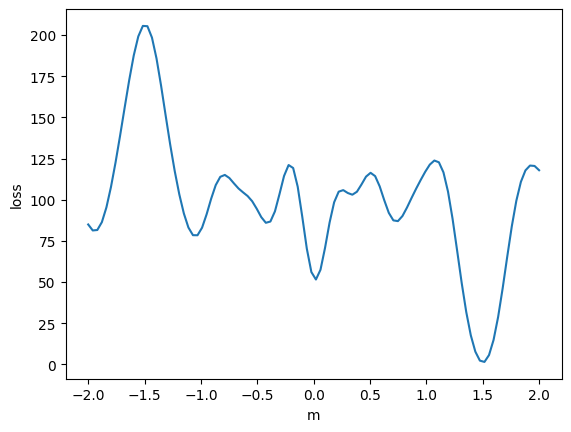

In [48]:
# plot the data to observe the minimas
plt.plot(m, loss_data)
plt.xlabel("m")
plt.ylabel('loss')

It is very clear that the loss plot is not convex and there are several local minimas.  So, it is going to be hard to find the global minima using a simple gradient descent method.

### let's generate the sinusoidal data with a scale.  Now, our mathematical model is $\hat{y} = m_1\sin(m_2 x)$

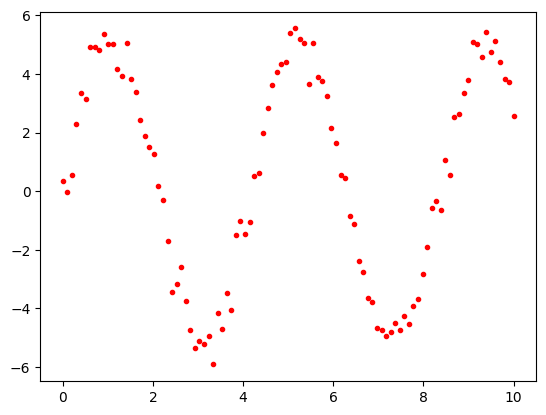

In [100]:
M1 = 5
M2 = 1.5

x = np.linspace(0, 10, N_SAMPLES)
y = M1 * np.sin(M2*x) + 0.5*np.random.randn(N_SAMPLES)
plt.plot(x,y,'r.')

### we will setup a line search for the parameters $m_1, m_2$ to based on loss minimization

In [101]:
# setup linear search for m.
m2 = np.linspace(-2, 2, 50)
m1 = np.linspace(-10, 10, 50)

### compute and cache the loss at different choice of 'm1 and m2' values.

In [105]:
# compute and collect the loss at different m values.
# We are caching the losses to reuse while generating the surface plot.
loss = {}
for m1_ in m1:
    for m2_ in m2:
        yhat = m1_ * np.sin(m2_ * x)
        key = f"{round(m1_,2)} {round(m2_,2)}"
        loss[key] = np.sum((y - yhat)**2)

### let's make a surface plot of the loss to see how wicked it is!!

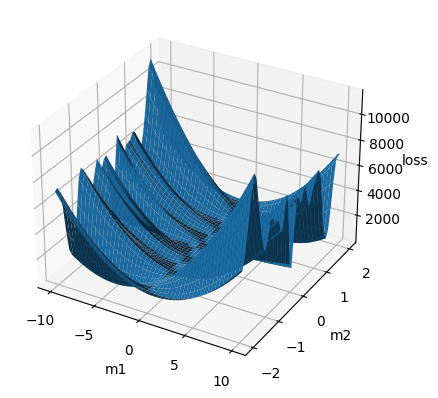

In [110]:
from matplotlib import cm

# Make data
_m1, _m2 = np.meshgrid(m1, m2)
L = np.zeros(_m1.shape)
for a in range(_m1.shape[0]):
    for b in range(_m1.shape[1]):
        m1_ = _m1[a,b]
        m2_ = _m2[a,b]
        # Recomputing the loss here is computationally intensive.
        # So, let's cache them ahead and reuse here.
        #yhat = m1_ * np.sin(m2_ * x)
        #L[a,b] = np.sum((y - yhat)**2)
        key = f"{round(m1_,2)} {round(m2_,2)}"
        L[a,b] = loss[key]

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(_m1, _m2, L, vmin=L.min() * 2) #, cmap=cm.Blues)

#ax.set(xticklabels=[],
#       yticklabels=[],
#       zticklabels=[])

ax.set_xlabel("m1")
ax.set_ylabel("m2")
ax.set_zlabel("loss")

plt.show()

It is evident from this 3d plot that the surface of the loss function is crazy corrugated.  One has to be lucky to use GD to find the global minimum!! Good luck!!
